## EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering
### Name:  Kavinda W.M.C.
### Index: 200301D

Import Libraries

In [53]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Question 1

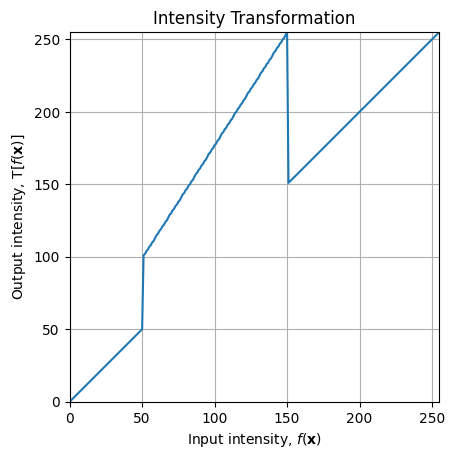

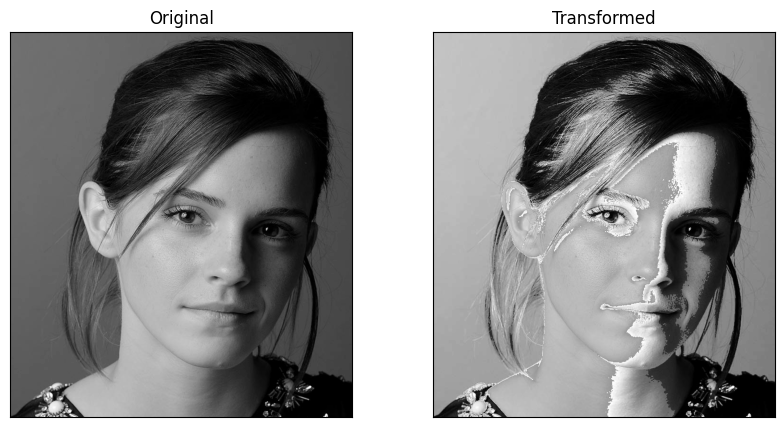

In [54]:
c = np.array([(50, 50), (50, 100), (150,255), (150,150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1] + 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')

transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.grid()
ax.set_xlabel(r'Input intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.set_title('Intensity Transformation')
plt.show()
img_orig = cv.imread ('emma.jpg' , cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)
fig, axes = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (10, 5))
axes[0].imshow(img_orig, cmap= 'gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image_transformed, cmap= 'gray')
axes[1].set_title('Transformed')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

Question 2

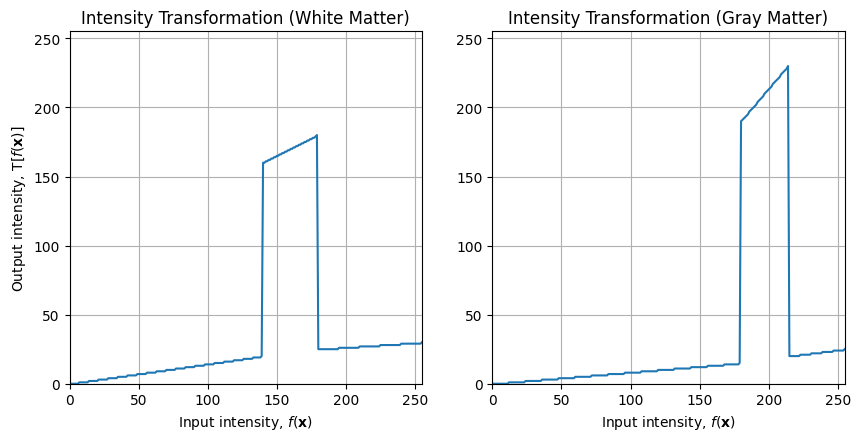

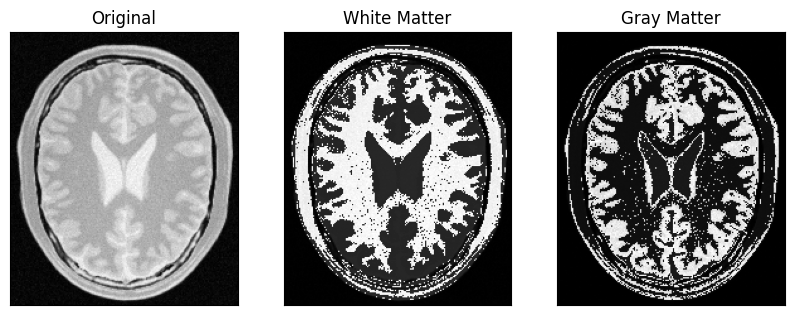

In [55]:
tw1 = np.linspace(0, 20, 140)
tw2 = np.linspace(160, 180, 40)
tw3 = np.linspace(25, 30, 76)

tg1 = np.linspace(0, 15, 180)
tg2 = np.linspace(190, 230, 35)
tg3 = np.linspace(20, 25, 41)


tw = np.concatenate((tw1,tw2,tw3),axis=0).astype(np.uint8)
tg = np.concatenate((tg1, tg2, tg3), axis = 0).astype(np.uint8)

fig, ax = plt.subplots(1, 2 , figsize = (10,5))
ax[0].plot(tw)
ax[0].grid()
ax[0].set_xlabel(r'Input intensity, $f(\mathbf{x})$')
ax[0].set_ylabel('Output intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
ax[0].set_title('Intensity Transformation (White Matter)')
ax[1].plot(tg)
ax[1].grid()
ax[1].set_xlabel(r'Input intensity, $f(\mathbf{x})$')
ax[1].set_xlim(0,255)
ax[1].set_ylim(0,255)
ax[1].set_aspect('equal')
ax[1].set_title('Intensity Transformation (Gray Matter)')
plt.show()
img_orig = cv.imread ('BrainProtonDensitySlice9.png' , cv.IMREAD_GRAYSCALE)
white_matter = cv.LUT(img_orig, tw)
gray_matter = cv.LUT(img_orig, tg)
fig, axes = plt.subplots(1, 3, sharex = 'all', sharey = 'all', figsize = (10, 5))
axes[0].imshow(img_orig, cmap= 'gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(white_matter, cmap= 'gray')
axes[1].set_title('White Matter')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(gray_matter, cmap= 'gray')
axes[2].set_title('Gray Matter')
axes[2].set_xticks([]), axes[1].set_yticks([])
plt.show()

Question 3(a)

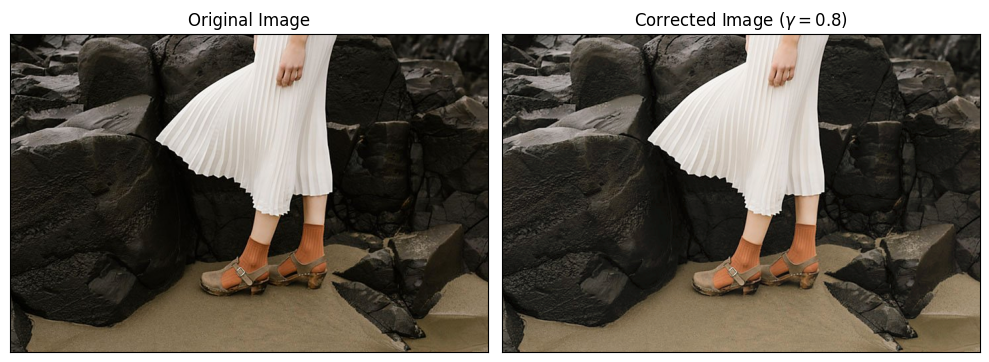

In [56]:
img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)

L_channel = img_lab[:, :, 0]
gamma = 0.8
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
L_corrected = cv.LUT(L_channel, table)
img_lab[:, :, 0] = L_corrected
img_corrected_bgr = cv.cvtColor(img_lab, cv.COLOR_Lab2BGR)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_corrected_bgr, cv.COLOR_BGR2RGB))
plt.title(f'Corrected Image ($\gamma = {gamma}$)')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


Question 3(b)

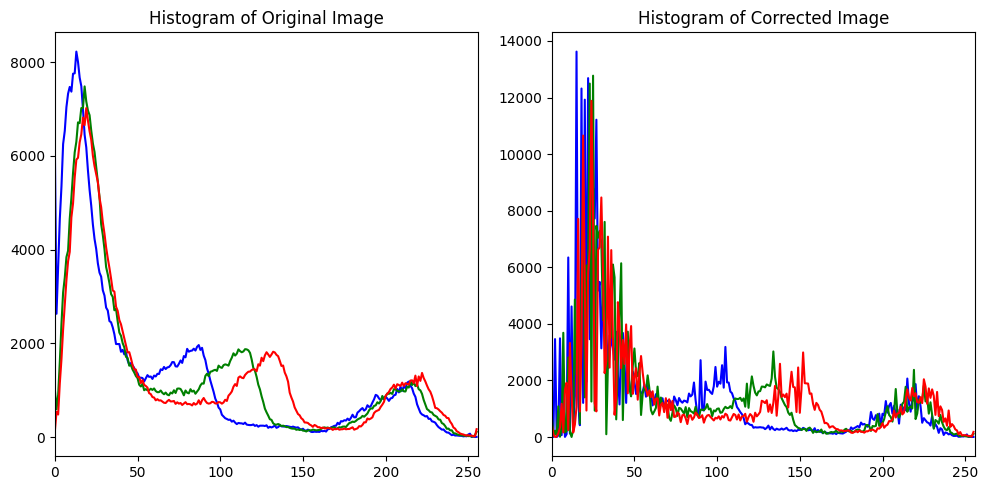

In [57]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
color = ('b', 'g', 'r')
for i,c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    ax[0].plot(hist_orig, color = c) 
ax[0].set_xlim([0,256])
ax[0].set_title('Histogram of Original Image')

for i,c in enumerate(color):
    hist_corrected = cv.calcHist([img_corrected_bgr], [i], None, [256], [0, 256])
    ax[1].plot(hist_corrected, color = c) 
ax[1].set_xlim([0,256])
ax[1].set_title('Histogram of Corrected Image')
plt.tight_layout()
plt.show()


Question 4

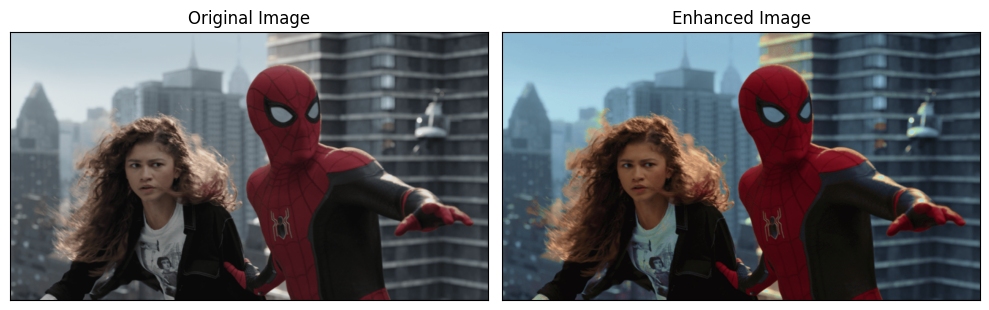

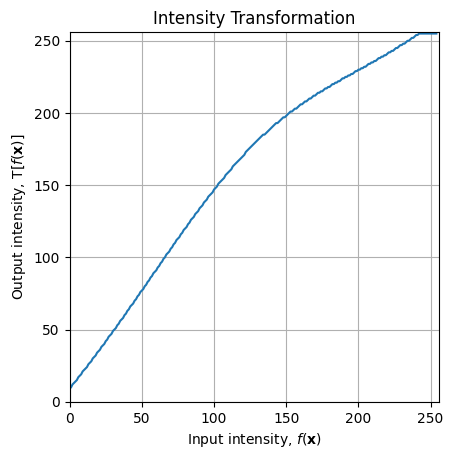

In [58]:
image = cv.imread('spider.png', cv.IMREAD_COLOR)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# (a) Split into HSV planes
hue, saturation, value = cv.split(hsv_image)

# (b) Apply the intensity transformation to the saturation plane
def intensity_transformation(x, a, sigma=70):
    f_x = np.minimum(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255).astype('uint8')
    return f_x

a = 0.4
transformed_saturation = intensity_transformation(saturation, a)

# (d) Recombine the three planes
enhanced_hsv_image = cv.merge([hue, transformed_saturation, value])

# Convert back to BGR for visualization
enhanced_image = cv.cvtColor(enhanced_hsv_image, cv.COLOR_HSV2BGR)

# (e) Display the images and intensity transformation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
x = np.arange(0, 255)
f_x = np.minimum(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * 70 ** 2)), 255).astype('uint8')
ax.plot(x, f_x)
ax.grid()
ax.set_xlabel(r'Input intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,256)
ax.set_ylim(0,256)
ax.set_aspect('equal')
ax.set_title('Intensity Transformation')
plt.show()

Question 5

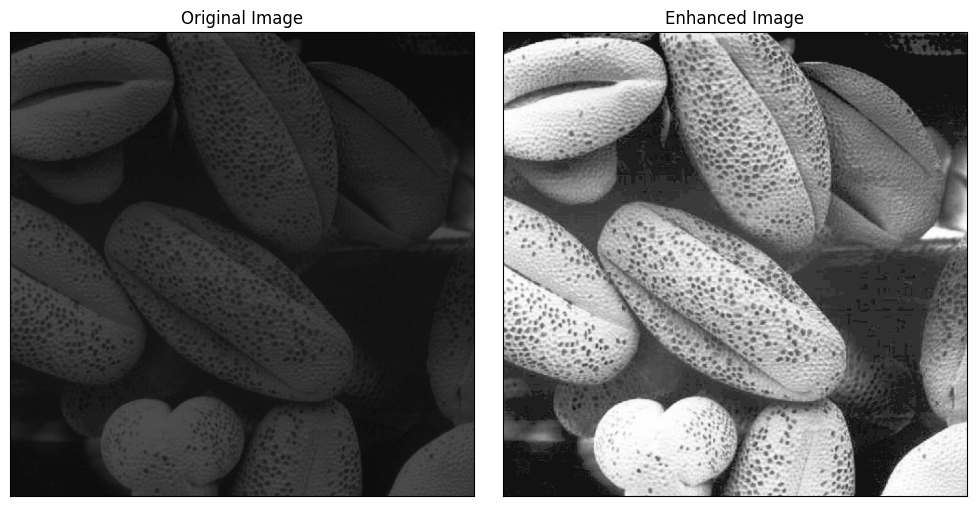

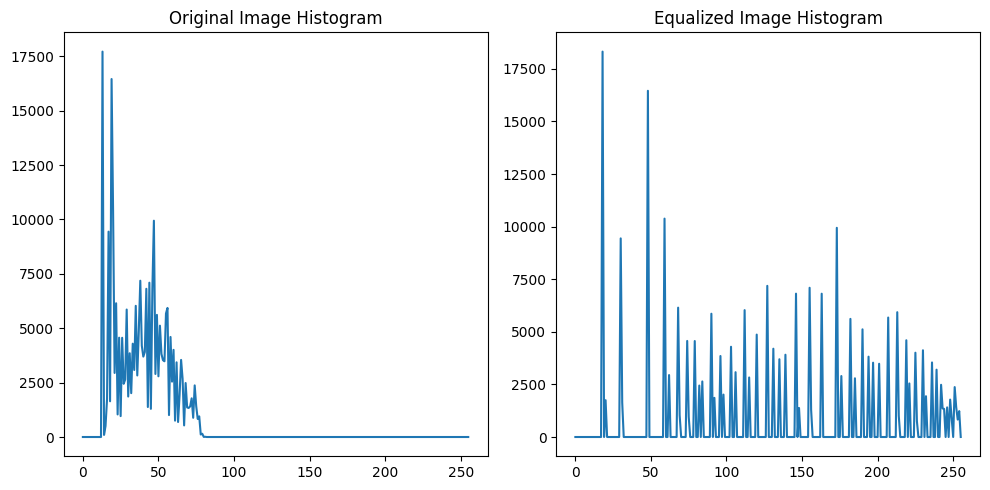

In [59]:
def histogram_equalization(image):
   
    histogram_orig = cv.calcHist([image], [0], None, [256], [0,256])
    cdf = np.cumsum(histogram_orig)
    equalized_hist = (cdf * 255 / cdf.max()).astype('uint8')
    equalized_image = cv.LUT(image, equalized_hist).astype('uint8')

    return equalized_image

image = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)

equalized_image = histogram_equalization(image)

# Display original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


# Plot histograms before and after equalization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
histogram_orig = cv.calcHist([image], [0], None, [256], [0,256])
plt.plot(histogram_orig)
plt.title('Original Image Histogram')

plt.subplot(1, 2, 2)
histogram_eqaulized = cv.calcHist([equalized_image], [0], None, [256], [0,256])
plt.plot(histogram_eqaulized)
plt.title('Equalized Image Histogram')

plt.tight_layout()
plt.show()



Question 6

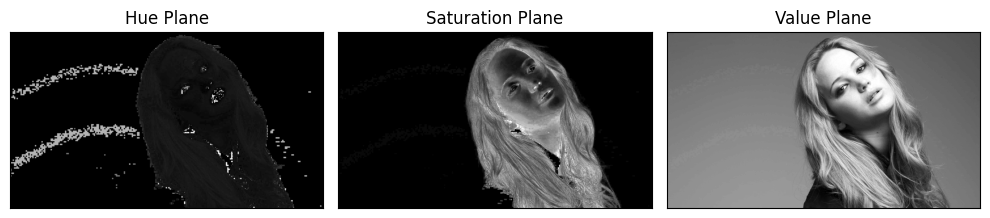

In [60]:
img6 = cv.imread('jeniffer.jpg', cv.IMREAD_COLOR)
hsv_image = cv.cvtColor(img6, cv.COLOR_BGR2HSV)

# (a) Split into HSV planes
hue, saturation, value = cv.split(hsv_image)

# Display the grayscale planes
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(hue, cmap='gray')
plt.title('Hue Plane')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Plane')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(value, cmap='gray')
plt.title('Value Plane')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


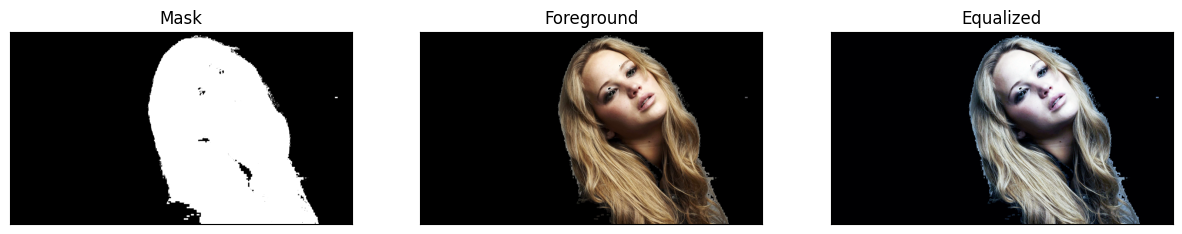

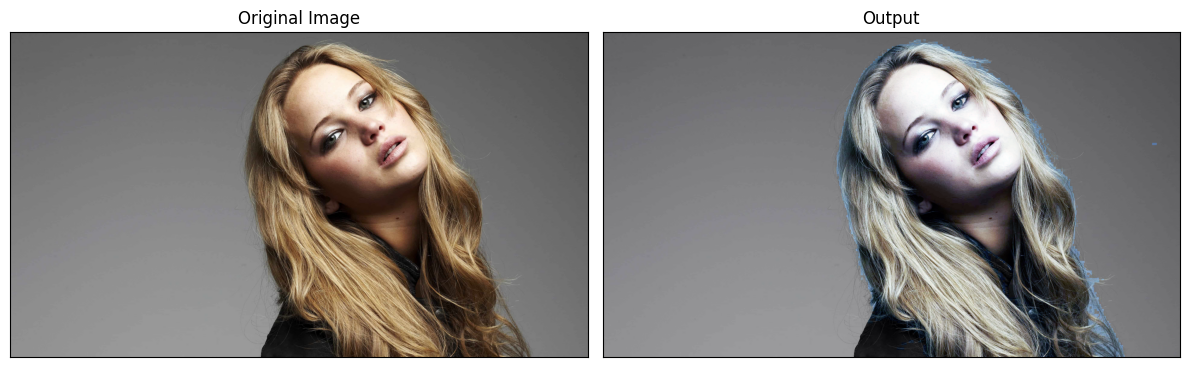

In [61]:
mask = cv.threshold(saturation, 11, 255, cv.THRESH_BINARY)[1]
foreground = cv.bitwise_and(img6, img6, mask=mask)

hist_blue = cv.calcHist([foreground], [0], mask, [256], [0, 256])
hist_green = cv.calcHist([foreground], [1], mask, [256], [0, 256])
hist_red = cv.calcHist([foreground], [2], mask, [256], [0, 256])

hist_blue_sum = np.cumsum(hist_blue)
hist_green_sum = np.cumsum(hist_green)
hist_red_sum = np.cumsum(hist_red)

equalized_hist_blue = (hist_blue_sum * 255 / hist_blue_sum.max()).astype('uint8')
equalized_hist_green = (hist_green_sum * 255 / hist_green_sum.max()).astype('uint8')
equalized_hist_red = (hist_red_sum * 255 / hist_red_sum.max()).astype('uint8')

blue_equalized = equalized_hist_blue[foreground[:,:,0]]
green_equalized = equalized_hist_green[foreground[:,:,1]]
red_equalized = equalized_hist_red[foreground[:,:,2]]

equalized = cv.merge([blue_equalized,green_equalized,red_equalized])

background_mask = cv.bitwise_not(mask)
background = cv.bitwise_and(img6,img6, mask=background_mask)

output = cv.add(background,equalized)

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(equalized, cv.COLOR_BGR2RGB))
plt.title('Equalized')
plt.xticks([]), plt.yticks([])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img6, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title('Output')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

Question 7(a)

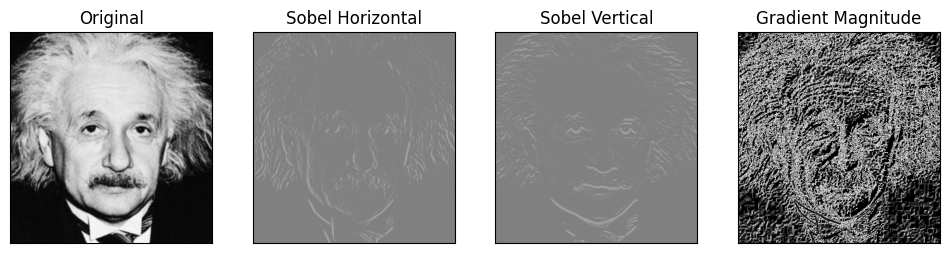

In [62]:
image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

sobel_hor = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float')
sobel_ver = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype='float')

# Apply the Sobel filters using filter2D
gradient_hor = cv.filter2D(image, -1, sobel_hor)
gradient_ver = cv.filter2D(image, -1, sobel_ver)

# Calculate the magnitude of the gradient
gradient_magnitude = np.sqrt(gradient_hor**2 + gradient_ver**2)

# Plot original image
fig,ax = plt.subplots(1,4,figsize = (12,6))
ax[0].imshow(image, cmap = 'gray')
ax[0].set_title('Original')
ax[1].imshow(gradient_hor, cmap = 'gray', vmin =-1020, vmax=1020)
ax[1].set_title('Sobel Horizontal')
ax[2].imshow(gradient_ver, cmap = 'gray', vmin =-1020, vmax=1020)
ax[2].set_title('Sobel Vertical')
ax[3].imshow(gradient_magnitude, cmap = 'gray')
ax[3].set_title('Gradient Magnitude')

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()


Question 7(b)

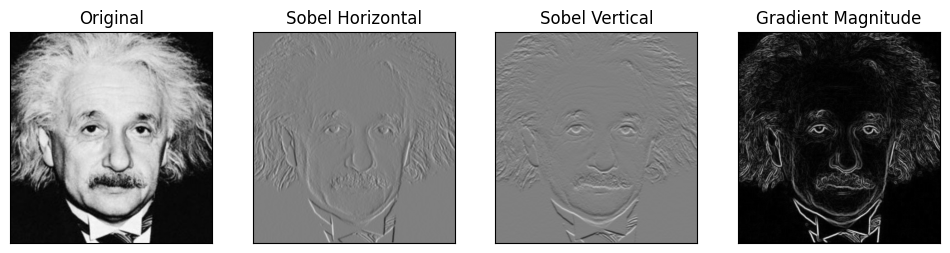

In [63]:
image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

sobel_hor = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float')
sobel_ver = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype='float')

height, width = image.shape

sobel_hor_result = np.zeros_like(image, dtype='float')
sobel_ver_result = np.zeros_like(image, dtype='float')

# Apply the Sobel kernels to the image using convolution
for i in range(1, height - 1):
    for j in range(1, width - 1):
        sobel_hor_result[i, j] = np.sum(np.multiply(image[i - 1:i + 2, j - 1:j + 2], sobel_hor))
        sobel_ver_result[i, j] = np.sum(np.multiply(image[i - 1:i + 2, j - 1:j + 2], sobel_ver))

# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(sobel_hor_result**2 + sobel_ver_result**2)

fig,ax = plt.subplots(1,4,figsize = (12,6))
ax[0].imshow(image, cmap = 'gray')
ax[0].set_title('Original')
ax[1].imshow(sobel_hor_result, cmap = 'gray', vmin =-1020, vmax=1020)
ax[1].set_title('Sobel Horizontal')
ax[2].imshow(sobel_ver_result, cmap = 'gray', vmin =-1020, vmax=1020)
ax[2].set_title('Sobel Vertical')
ax[3].imshow(gradient_magnitude, cmap = 'gray')
ax[3].set_title('Gradient Magnitude')

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()


Question 7(c)

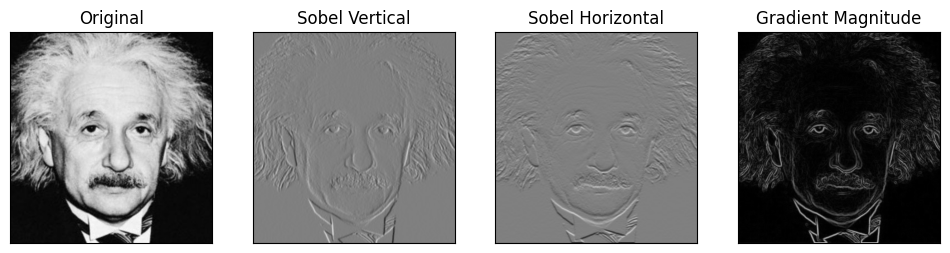

In [64]:
import scipy.signal as sig
image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

intermediate_x_gradient_1 = np.zeros(image.shape)
final_x_gradient = np.zeros(image.shape)
intermediate_y_gradient_1 = np.zeros(image.shape)
final_y_gradient = np.zeros(image.shape)

# Sobel Vertical Kernel
sobel_ver_kernel1 = np.array([[1],[2],[1]])
sobel_ver_kernel2 = np.array([[1, 0, -1]])

# Sobel Horizontal Kernel
sobel_hor_kernel1 = np.array([[1],[0],[-1]])
sobel_hor_kernel2 = np.array([[1, 2, 1]])

intermediate_x_gradient_1 = sig.convolve2d(image, sobel_ver_kernel1, mode="same")
final_x_gradient = sig.convolve2d(intermediate_x_gradient_1, sobel_ver_kernel2, mode="same")
intermediate_y_gradient_1 = sig.convolve2d(image, sobel_hor_kernel1, mode="same")
final_y_gradient = sig.convolve2d(intermediate_y_gradient_1, sobel_hor_kernel2, mode="same")
        
#Calculate the gradient magnitude
gradient_magnitude = np.sqrt(final_x_gradient**2 + final_y_gradient**2)

fig, ax = plt.subplots(1, 4, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(final_x_gradient, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title('Sobel Vertical')
ax[2].imshow(final_y_gradient, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[3].imshow(gradient_magnitude, cmap='gray')
ax[3].set_title('Gradient Magnitude')

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])

plt.show()


Question 8

In [65]:
img_orig1 = cv.imread('zooming/im01.png', cv.IMREAD_COLOR)
img_orig2 = cv.imread('zooming/im02.png', cv.IMREAD_COLOR)

img_small1 = cv.imread('zooming/im01small.png', cv.IMREAD_COLOR)
img_small2 = cv.imread('zooming/im02small.png', cv.IMREAD_COLOR)

def nearest_neighbour(image, scale):
    rows = int(image.shape[0] * scale)
    columns = int(image.shape[1] * scale)
    
    scaled = np.zeros((rows, columns, image.shape[2]), dtype = 'uint8')
    for i in range(rows):
        for j in range(columns):
            scaled[i,j] = image[i//scale, j//scale]
    return scaled

def bilinear_interpolation(image, scale):
    rows = int(image.shape[0] * scale)
    columns = int(image.shape[1] * scale)
    
    scaled = cv.resize(image, (columns,rows), interpolation = cv.INTER_LINEAR)
    return scaled

def ssd(image1, image2):
    return np.sum(((image1[:,:]- image2[:,:]) ** 2)/(3*255**2)) / (image1.shape[0]*image1.shape[1])



### (a)Nearest Neighbor

Small Image 1:  (270, 480, 3)
Small Image 2:  (300, 480, 3)
Zoomed Image 1 (nearest):  (1080, 1920, 3)
Zoomed Image 2 (nearest):  (1200, 1920, 3)
SSD for Image 1 (nearest): 0.0004811121335890121
SSD for Image 2 (nearest): 0.0001830374980420635


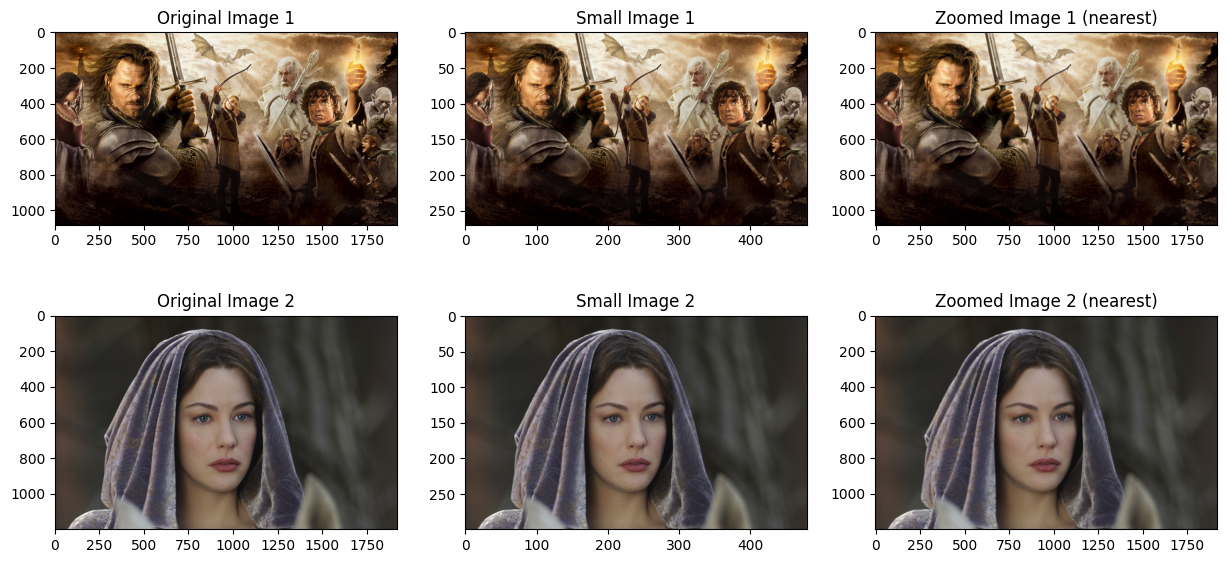

In [66]:
scale = 4

img_zoom1_n = nearest_neighbour(img_small1, scale)
img_zoom2_n = nearest_neighbour(img_small2, scale)
print("Small Image 1: ",img_small1.shape)
print("Small Image 2: ",img_small2.shape)
print("Zoomed Image 1 (nearest): ",img_zoom1_n.shape)
print("Zoomed Image 2 (nearest): ",img_zoom2_n.shape)
print("SSD for Image 1 (nearest):", ssd(img_orig1, img_zoom1_n))
print("SSD for Image 2 (nearest):", ssd(img_orig2, img_zoom2_n))

# Plotting in openCV Windows
# cv.imshow('Small Image',img_small1)
# cv.waitKey(0)
# cv.imshow('Zoomed Image',img_zoom1_n)
# cv.waitKey(0)
# cv.destroyAllWindows()

# Plot the original, small and the nearest_neighbour zoomed image
fig,ax = plt.subplots(2,3, figsize = (15,7))
ax[0,0].imshow(cv.cvtColor(img_orig1, cv.COLOR_BGR2RGB))
ax[0,0].set_title("Original Image 1")
ax[0,1].imshow(cv.cvtColor(img_small1, cv.COLOR_BGR2RGB))
ax[0,1].set_title("Small Image 1")
ax[0,2].imshow(cv.cvtColor(img_zoom1_n, cv.COLOR_BGR2RGB))
ax[0,2].set_title("Zoomed Image 1 (nearest)")
ax[1,0].imshow(cv.cvtColor(img_orig2, cv.COLOR_BGR2RGB))
ax[1,0].set_title("Original Image 2")
ax[1,1].imshow(cv.cvtColor(img_small2, cv.COLOR_BGR2RGB))
ax[1,1].set_title("Small Image 2")
ax[1,2].imshow(cv.cvtColor(img_zoom2_n, cv.COLOR_BGR2RGB))
ax[1,2].set_title("Zoomed Image 2 (nearest)")
plt.show()

### (b)Bilinear Interpolation

Small Image 1:  (270, 480, 3)
Small Image 2:  (300, 480, 3)
Zoomed Image 1 (bilinear):  (1080, 1920, 3)
Zoomed Image 2 (bilinear):  (1200, 1920, 3)
SSD for Image 1 (bilinear): 0.0004775562417232688
SSD for Image 2 (bilinear): 0.00016429053061856538


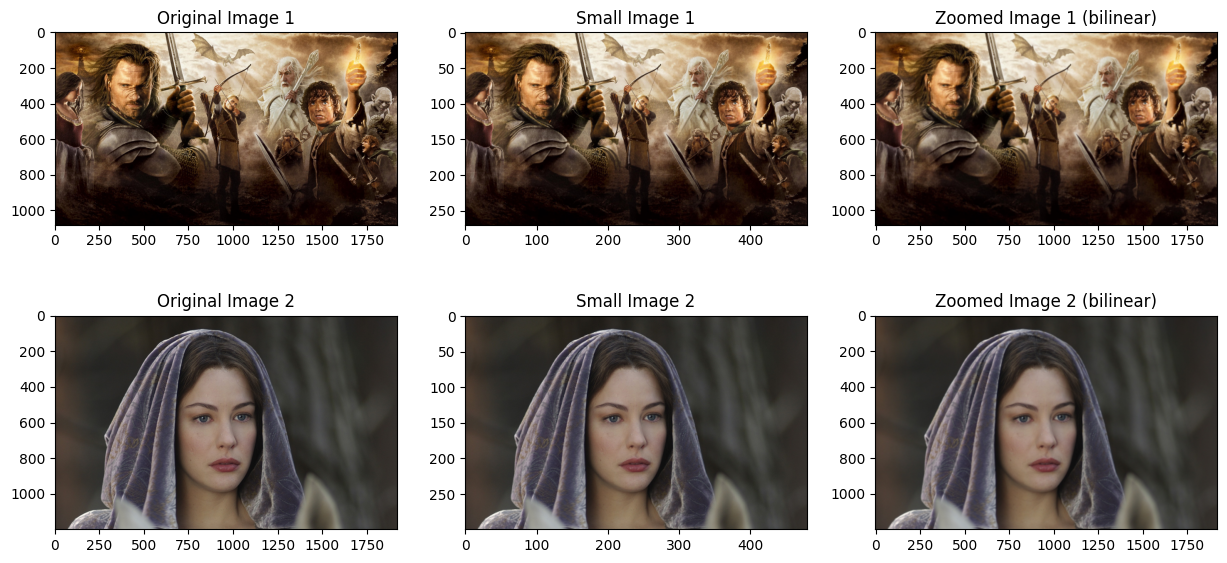

In [67]:
scale = 4

img_zoom1_b = bilinear_interpolation(img_small1, scale)
img_zoom2_b = bilinear_interpolation(img_small2, scale)
print("Small Image 1: ",img_small1.shape)
print("Small Image 2: ",img_small2.shape)
print("Zoomed Image 1 (bilinear): ",img_zoom1_b.shape)
print("Zoomed Image 2 (bilinear): ",img_zoom2_b.shape)
print("SSD for Image 1 (bilinear):", ssd(img_orig1, img_zoom1_b))
print("SSD for Image 2 (bilinear):", ssd(img_orig2, img_zoom2_b))

# Plotting in openCV Windows
# cv.imshow('Small Image',img_small1)
# cv.waitKey(0)
# cv.imshow('Zoomed Image',img_zoom1_b)
# cv.waitKey(0)
# cv.destroyAllWindows()

# Plot the original, small and the nearest_neighbour zoomed image
fig,ax = plt.subplots(2,3, figsize = (15,7))
ax[0,0].imshow(cv.cvtColor(img_orig1, cv.COLOR_BGR2RGB))
ax[0,0].set_title("Original Image 1")
ax[0,1].imshow(cv.cvtColor(img_small1, cv.COLOR_BGR2RGB))
ax[0,1].set_title("Small Image 1")
ax[0,2].imshow(cv.cvtColor(img_zoom1_b, cv.COLOR_BGR2RGB))
ax[0,2].set_title("Zoomed Image 1 (bilinear)")
ax[1,0].imshow(cv.cvtColor(img_orig2, cv.COLOR_BGR2RGB))
ax[1,0].set_title("Original Image 2")
ax[1,1].imshow(cv.cvtColor(img_small2, cv.COLOR_BGR2RGB))
ax[1,1].set_title("Small Image 2")
ax[1,2].imshow(cv.cvtColor(img_zoom2_b, cv.COLOR_BGR2RGB))
ax[1,2].set_title("Zoomed Image 2 (bilinear)")
plt.show()

Question 9(a)

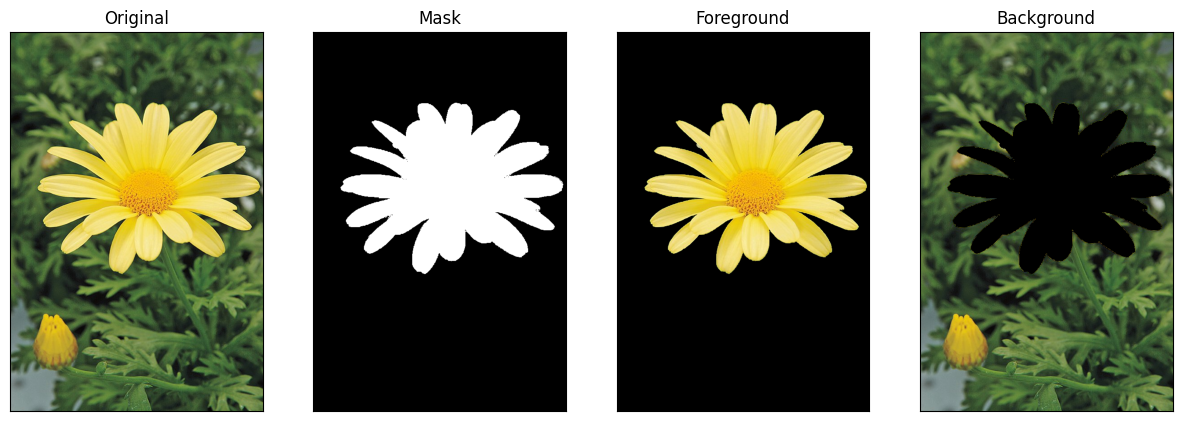

In [68]:
image = cv.imread('daisy.jpg', cv.IMREAD_COLOR)

mask = np.zeros(image.shape[:2], dtype='uint8')
rect = (50, 100, 561, 500) #image.shape = (841, 561, 3)

background_mdl = np.zeros((1,65), dtype='float')
foreground_mdl = np.zeros((1,65), dtype='float')


cv.grabCut(image, mask, rect, background_mdl, foreground_mdl, 5, mode=cv.GC_INIT_WITH_RECT)

fore_mask = np.where((mask==0) | (mask==2), 0, 1).astype('uint8')
foreground = image*fore_mask[:, :, np.newaxis]
back_mask = np.where((mask==1) | (mask==3), 0, 1).astype('uint8')
background = image*back_mask[:, :, np.newaxis]

fig,ax = plt.subplots(1,4,figsize = (15,6))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[1].imshow(fore_mask, cmap = 'gray')
ax[1].set_title("Mask")
ax[2].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground")
ax[3].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
ax[3].set_title("Background")

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

Question 9(b)

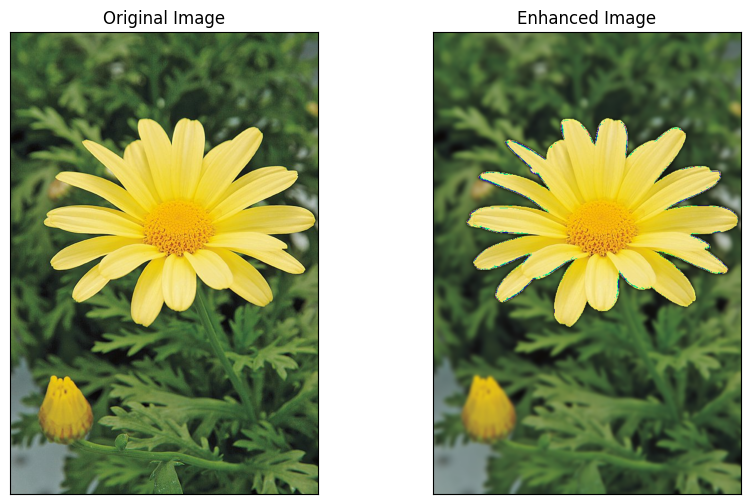

In [69]:
enhanced = np.clip(np.add(foreground, cv.GaussianBlur(background, (15,15), 0)), 0, 255)
fig,ax = plt.subplots(1,2,figsize = (10,6))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")

for i in range(2):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()